<a href="https://colab.research.google.com/github/GOKULA-127/TARP/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file (replace with your file name)
df = pd.read_csv("crop_and_price_prediction.csv")

# Check data
print(df.head())


Saving crop_and_price_prediction.csv to crop_and_price_prediction.csv
      N     P     K  temperature   humidity        ph    rainfall  Crop  \
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice   
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice   
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice   
3  74.0  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice   
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice   

            State  CostCultivation  CostCultivation2   Production      Yield  \
0  Andhra Pradesh      22350.18307       22351.18808  1527.853407  28.241963   
1  Andhra Pradesh      22350.18307       22351.18808  1527.853407  28.241963   
2  Andhra Pradesh      22350.18307       22351.18808  1527.853407  28.241963   
3  Andhra Pradesh      22350.18307       22351.18808  1527.853407  28.241963   
4  Andhra Pradesh      22350.18307       22351.18808  1527.853407  28.241963   

In [ ]:
!pip install pmdarima
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.3 MB/s eta 0:00:00


In [ ]:
print(df.info())
print(df.describe())
print(df.isna().sum())

# Example: plot average price by month
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.groupby(df['date'].dt.month)['price'].mean().plot(kind='bar')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N                 3039 non-null   float64
 1   P                 3039 non-null   float64
 2   K                 3039 non-null   float64
 3   temperature       3039 non-null   float64
 4   humidity          3039 non-null   float64
 5   ph                3039 non-null   float64
 6   rainfall          3039 non-null   float64
 7   Crop              3039 non-null   object 
 8   State             3039 non-null   object 
 9   CostCultivation   3039 non-null   float64
 10  CostCultivation2  3039 non-null   float64
 11  Production        3039 non-null   float64
 12  Yield             3039 non-null   float64
 13  Temperature       3039 non-null   float64
 14  RainFall Annual   3039 non-null   float64
 15  Price             3039 non-null   float64
dtypes: float64(14), object(2)
memory usage: 38

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        16
           2       0.94      1.00      0.97        16
           3       0.94      0.94      0.94        17
           4       1.00      1.00      1.00        19
           5       0.74      1.00      0.85        14
           6       1.00      1.00      1.00        15
           7       0.98      1.00      0.99       108
           8       0.00      0.00      0.00         1
           9       1.00      0.89      0.94        18
          10       0.00      0.00      0.00         0
          11       0.88      0.95      0.91        22
          12       0.95      1.00      0.97        18
          13       0.90      0.95      0.93        20
          14       1.00      1.00      1.00       117
          15       0.91      1.00      0.95        20
          17       0.85      0.79      0.81        14
          18       1.00      1.00      1.00        21
          19       1.00    

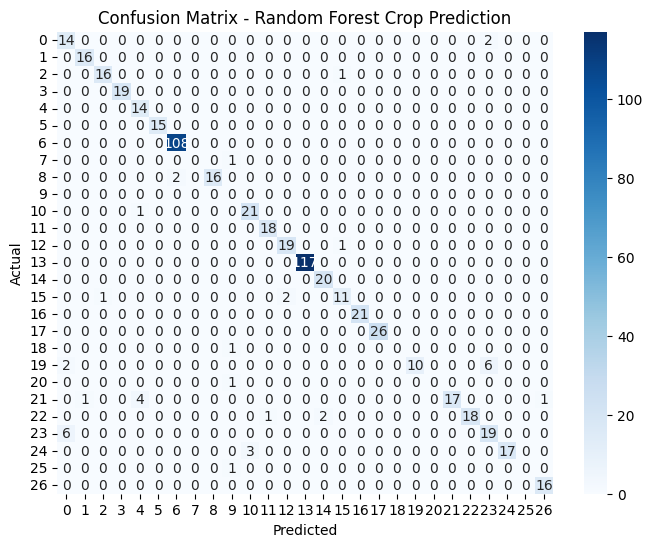

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("crop_and_price_prediction.csv")

# Encode Crop labels
le = LabelEncoder()
df['crop_label'] = le.fit_transform(df['Crop'])   # <-- Corrected column name

# Features (independent variables)
X = df[['rainfall','temperature','humidity']].fillna(0)

# Target (dependent variable)
y = df['crop_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Crop Prediction")
plt.show()


In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scipy==1.11.4 pmdarima==2.0.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB

In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scipy==1.11.4 pmdarima==2.0.4


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached cython-3.1.4-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (5.0 kB)
  Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.

In [ ]:
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("crop_and_price_prediction.csv")


In [ ]:
print(df['Crop'].unique())


['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee' 'arhar' 'gram' 'groundnut' 'moong' 'paddy' 'mustard'
 'sugarcane' 'wheat']


In [ ]:
!pip install pmdarima


In [ ]:
!pip install --upgrade pip setuptools wheel
!pip install --upgrade numpy pandas scikit-learn
!pip install --upgrade pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip uninstall -y numpy pmdarima scikit-learn
!pip install numpy==1.26.4 scikit-learn==1.5.1 pmdarima



Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.6 MB/s  0:00:01
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pmdarima]
ERROR: pip's dependency resolver does not currently take into accoun

In [ ]:
import numpy as np
import pandas as pd
import pmdarima as pm

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [ ]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("crop_and_price_prediction.csv")

# Get unique crops
crops = df["Crop"].str.lower().unique()
print("Crops in dataset:", crops)

# Number of future steps to forecast
n_forecast = 10

# Dictionary to store forecasts
forecast_results = {}

for crop in crops:
    df_crop = df[df["Crop"].str.lower() == crop]

    # Skip if no price data
    if "price" not in df_crop.columns or df_crop["price"].isnull().all():
        print(f"Skipping {crop} (no price data)")
        continue

    # Extract price series
    price_series = df_crop["price"].reset_index(drop=True)

    # Skip crops with too few records
    if len(price_series) < 5:
        print(f"Skipping {crop} (not enough data points)")
        continue

    try:
        # Fit Auto ARIMA
        model = pm.auto_arima(price_series, seasonal=False, stepwise=True, suppress_warnings=True)

        # Forecast
        forecast = model.predict(n_periods=n_forecast)

        # Save result
        forecast_results[crop] = forecast

        # Plot
        plt.figure(figsize=(8,4))
        plt.plot(price_series, label="Historical Price")
        plt.plot(range(len(price_series), len(price_series)+n_forecast), forecast, label="Forecast", color="red")
        plt.title(f"{crop.capitalize()} Price Forecast (ARIMA)")
        plt.xlabel("Time Steps")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error for {crop}: {e}")

# Print forecasts for all crops
for crop, forecast in forecast_results.items():
    print(f"\n📌 Forecast for {crop.capitalize()}: {forecast}")


Crops in dataset: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee' 'arhar' 'gram' 'groundnut' 'moong' 'paddy' 'mustard'
 'sugarcane' 'wheat']
Skipping rice (no price data)
Skipping maize (no price data)
Skipping chickpea (no price data)
Skipping kidneybeans (no price data)
Skipping pigeonpeas (no price data)
Skipping mothbeans (no price data)
Skipping mungbean (no price data)
Skipping blackgram (no price data)
Skipping lentil (no price data)
Skipping pomegranate (no price data)
Skipping banana (no price data)
Skipping mango (no price data)
Skipping grapes (no price data)
Skipping watermelon (no price data)
Skipping muskmelon (no price data)
Skipping apple (no price data)
Skipping orange (no price data)
Skipping papaya (no price data)
Skipping coconut (no price data)
Skipping cotton (no price data)
Skipping jute

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_and_price_prediction.csv to crop_and_price_prediction (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("crop_and_price_prediction.csv")



Crops in dataset: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee' 'arhar' 'gram' 'groundnut' 'moong' 'paddy' 'mustard'
 'sugarcane' 'wheat']


/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


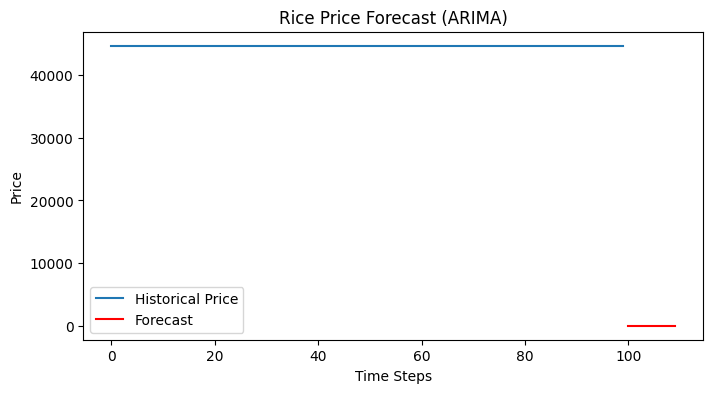

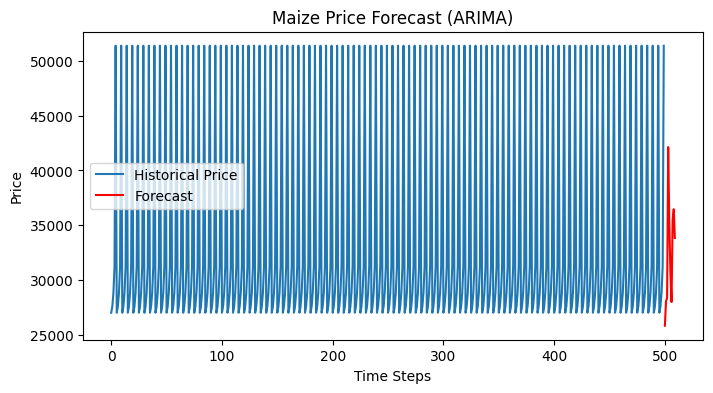

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


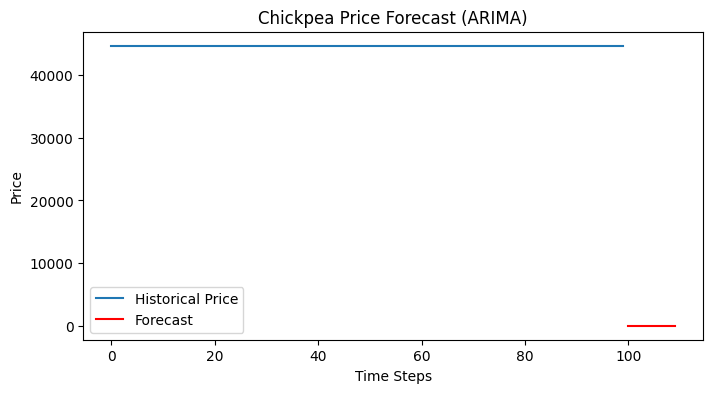

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


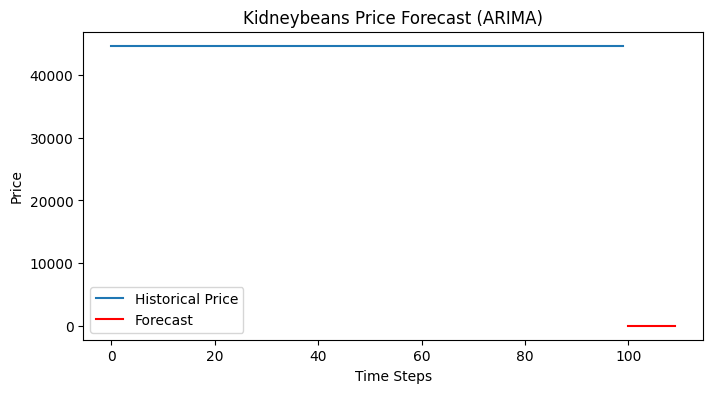

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


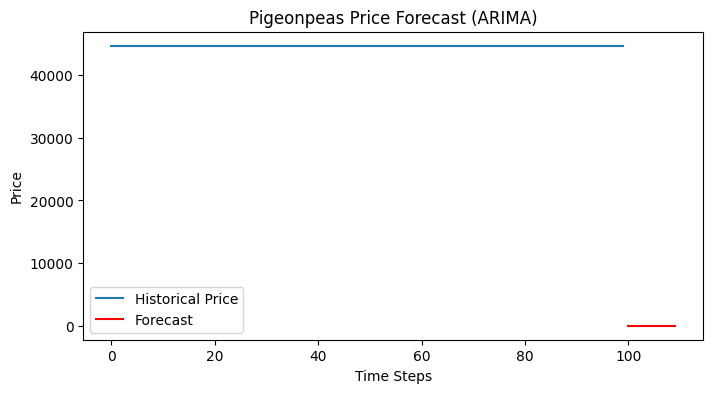

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


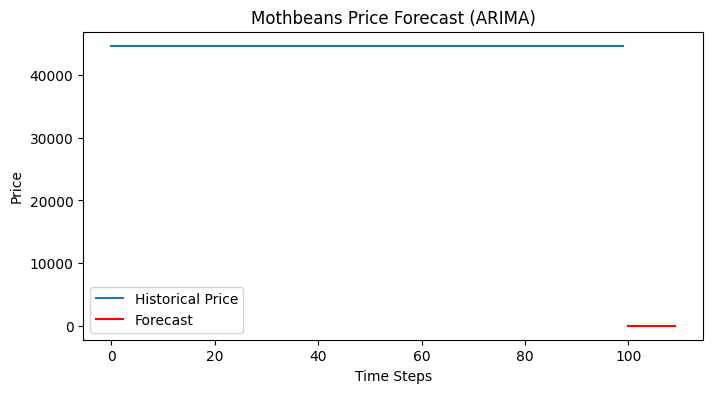

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


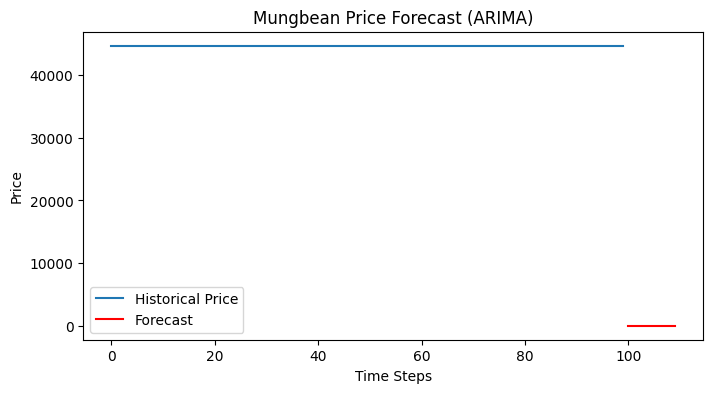

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


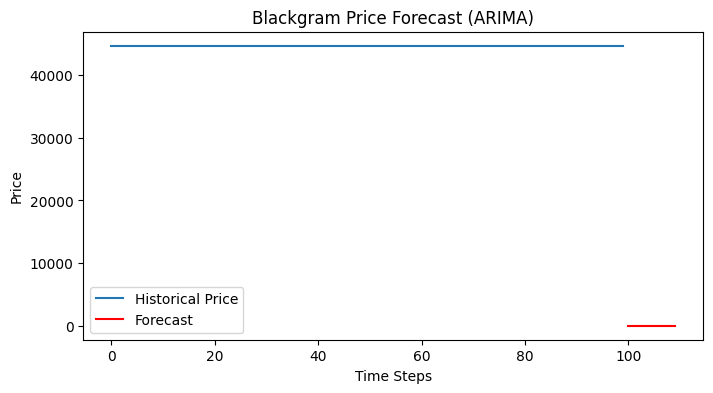

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


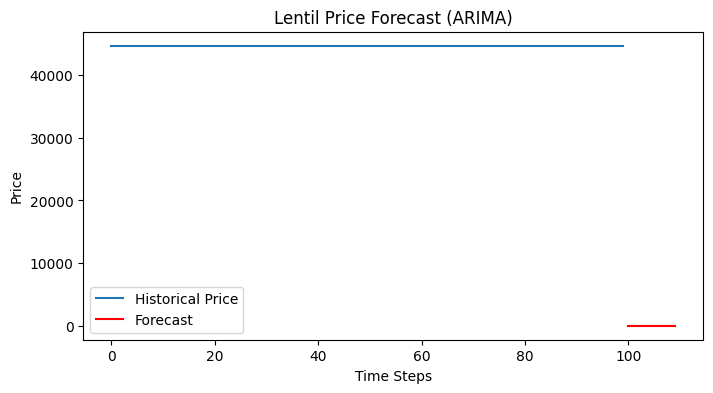

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


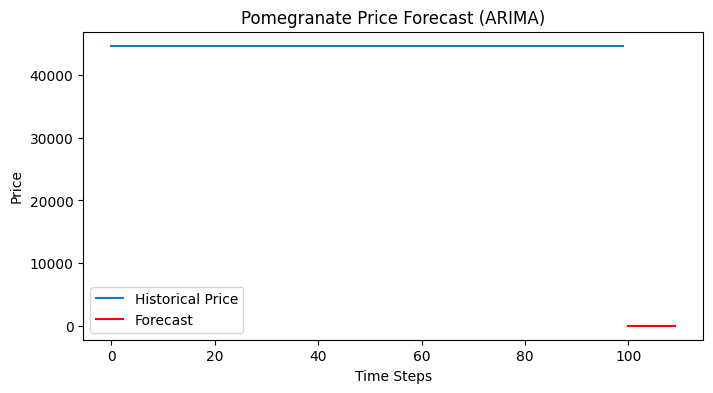

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


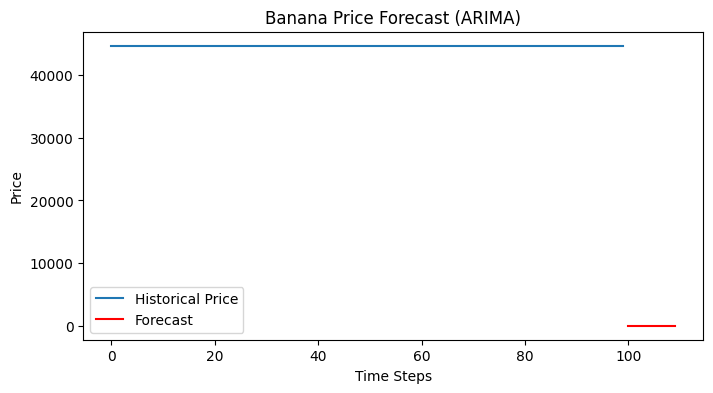

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


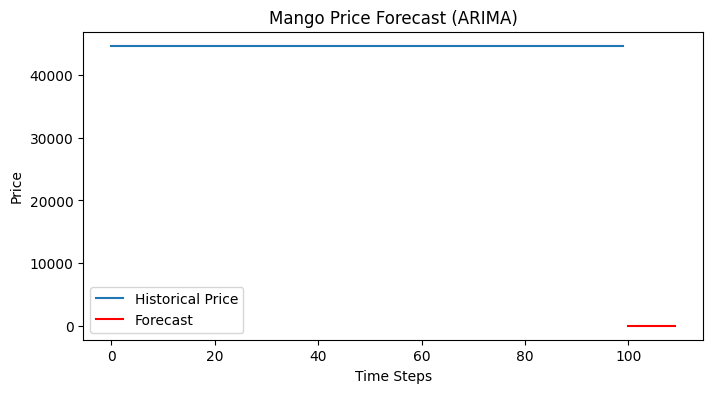

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


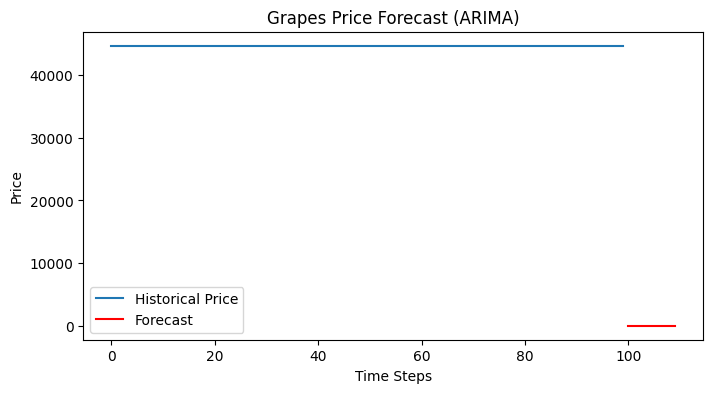

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


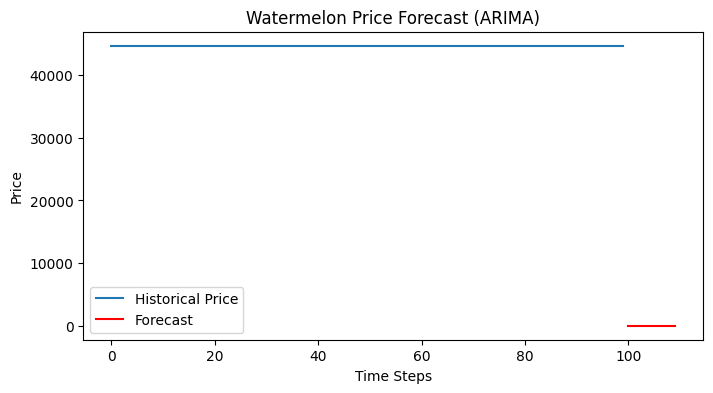

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


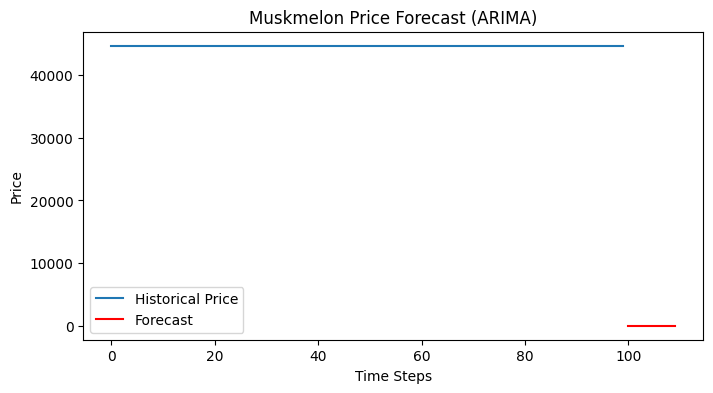

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


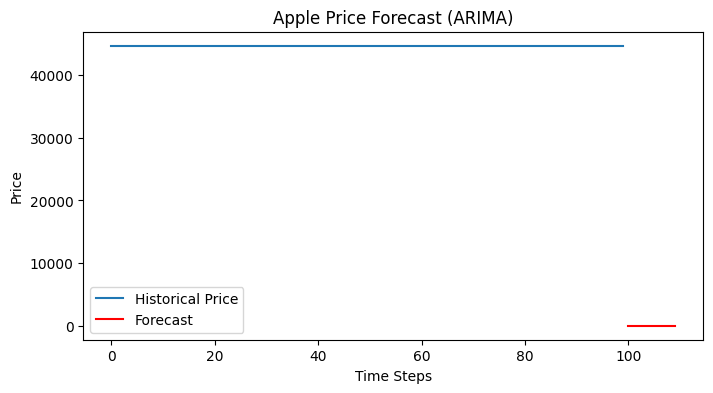

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


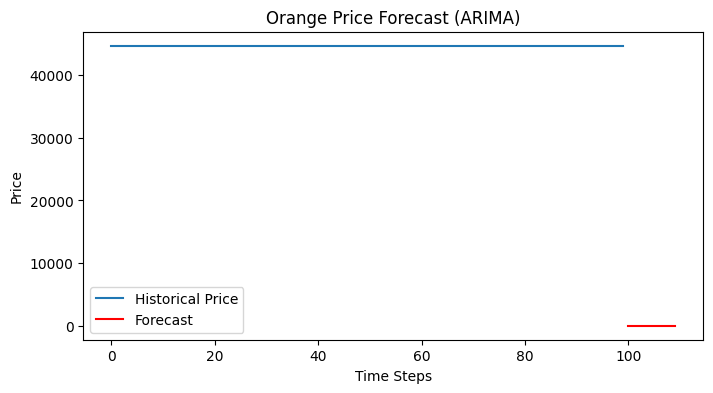

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


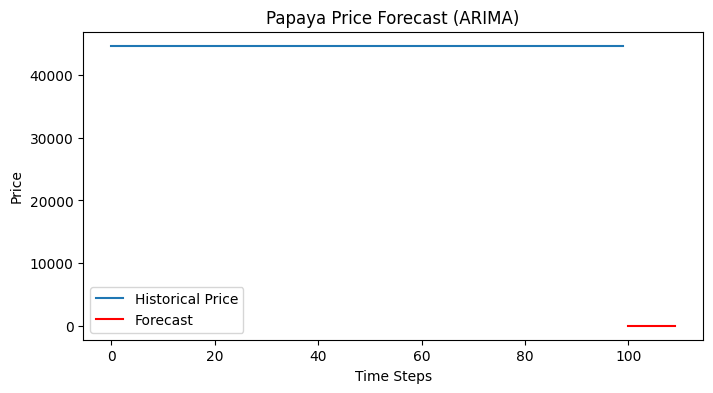

/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


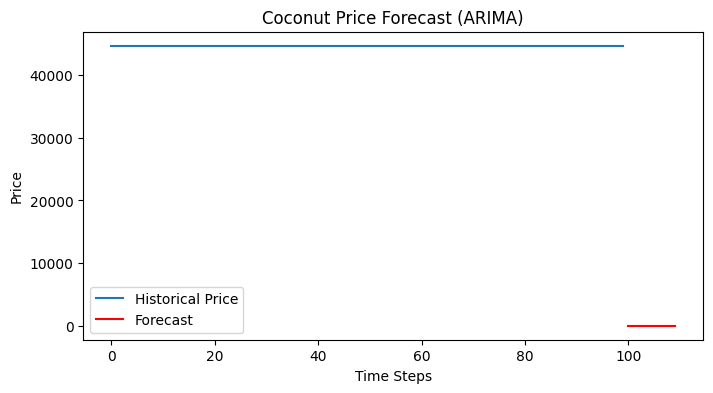

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("crop_and_price_prediction.csv")

# Get unique crops
crops = df["Crop"].str.lower().unique()
print("Crops in dataset:", crops)

# Number of future steps to forecast
n_forecast = 10

# Dictionary to store forecasts
forecast_results = {}

for crop in crops:
    df_crop = df[df["Crop"].str.lower() == crop]

    # Ensure Price column exists and has data
    if "Price" not in df_crop.columns or df_crop["Price"].isnull().all():
        print(f"Skipping {crop} (no price data)")
        continue

    # Extract price series
    price_series = df_crop["Price"].reset_index(drop=True)

    # Skip crops with too few records
    if len(price_series) < 5:
        print(f"Skipping {crop} (not enough data points)")
        continue

    try:
        # Fit Auto ARIMA
        model = pm.auto_arima(price_series, seasonal=False, stepwise=True, suppress_warnings=True)

        # Forecast
        forecast = model.predict(n_periods=n_forecast)

        # Save result
        forecast_results[crop] = forecast

        # Plot
        plt.figure(figsize=(8,4))
        plt.plot(price_series, label="Historical Price")
        plt.plot(range(len(price_series), len(price_series)+n_forecast), forecast, label="Forecast", color="red")
        plt.title(f"{crop.capitalize()} Price Forecast (ARIMA)")
        plt.xlabel("Time Steps")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error for {crop}: {e}")

# Print forecasts for all crops
for crop, forecast in forecast_results.items():
    print(f"\n📌 Forecast for {crop.capitalize()}: {forecast}")


In [ ]:
def predict_crop_and_price(input_features, n_forecast=10):
    """
    input_features: list [N, P, K, temperature, humidity, ph, rainfall]
    n_forecast: number of future time steps for price prediction
    """
    # Step 1: Predict suitable crop using Random Forest
    crop_label = rf.predict([input_features])[0]
    crop_name = le.inverse_transform([crop_label])[0]
    print(f"🌱 Predicted Suitable Crop: {crop_name}")

    # Step 2: Get crop price history
    df_crop = df[df["Crop"].str.lower() == crop_name.lower()]

    if "Price" not in df_crop.columns or df_crop["Price"].isnull().all():
        print("⚠️ No price data available for this crop.")
        return crop_name, None

    price_series = df_crop["Price"].reset_index(drop=True)

    if len(price_series) < 5:
        print("⚠️ Not enough price data to forecast.")
        return crop_name, None

    # Step 3: Forecast crop price using ARIMA
    try:
        model = pm.auto_arima(price_series, seasonal=False, stepwise=True, suppress_warnings=True)
        forecast = model.predict(n_periods=n_forecast)

        print(f"💰 Forecasted Prices for next {n_forecast} steps: {forecast}")

        # Plot results
        plt.figure(figsize=(8,4))
        plt.plot(price_series, label="Historical Price")
        plt.plot(range(len(price_series), len(price_series)+n_forecast), forecast, 'r--', label="Forecast")
        plt.title(f"{crop_name} Price Forecast")
        plt.xlabel("Time Steps")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        return crop_name, forecast

    except Exception as e:
        print(f"❌ ARIMA failed for {crop_name}: {e}")
        return crop_name, None


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Features (soil + weather parameters)
X = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]

# Target (crop names)
y = df["Crop"]

# Encode crop names → numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("✅ Random Forest trained successfully!")


✅ Random Forest trained successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


🌱 Predicted Suitable Crop: rice
💰 Forecasted Prices for next 10 steps: 100    0.0
101    0.0
102    0.0
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
108    0.0
109    0.0
dtype: float64


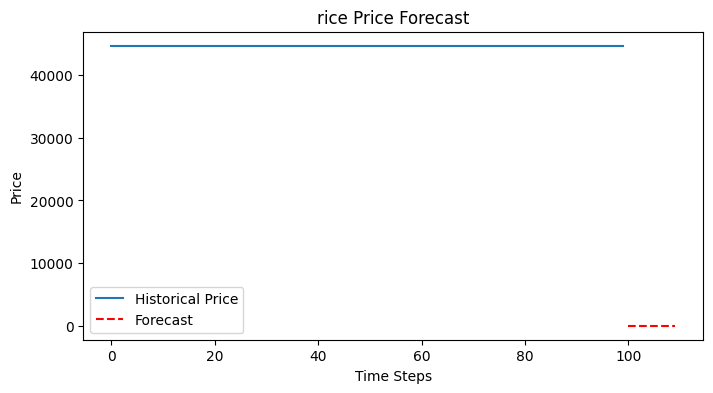

In [ ]:
crop, forecast = predict_crop_and_price([90, 42, 43, 20, 80, 6.5, 200], n_forecast=10)


In [ ]:
import pandas as pd
import pmdarima as pm

def forecast_all_crops(df, n_forecast=10):
    results = []

    # Loop through each crop
    for crop in df["Crop"].unique():
        crop_data = df[df["Crop"] == crop]["Price"].dropna()

        # Skip crops without price data
        if crop_data.empty or crop_data.nunique() <= 1:
            print(f"⚠️ Skipping {crop} (not enough price variation)")
            continue

        try:
            # Fit ARIMA
            model = pm.auto_arima(
                crop_data,
                seasonal=False,
                stepwise=True,
                suppress_warnings=True
            )

            # Forecast
            forecast = model.predict(n_periods=n_forecast)

            # Store results
            for f in forecast:
                results.append({"Crop": crop, "Forecasted_Price": f})

        except Exception as e:
            print(f"❌ Error for {crop}: {e}")

    # Convert to DataFrame
    return pd.DataFrame(results)

# Run forecast for all crops
forecast_df = forecast_all_crops(df, n_forecast=10)

print(forecast_df.head(20))   # Show first 20 results


⚠️ Skipping rice (not enough price variation)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


⚠️ Skipping chickpea (not enough price variation)
⚠️ Skipping kidneybeans (not enough price variation)
⚠️ Skipping pigeonpeas (not enough price variation)
⚠️ Skipping mothbeans (not enough price variation)
⚠️ Skipping mungbean (not enough price variation)
⚠️ Skipping blackgram (not enough price variation)
⚠️ Skipping lentil (not enough price variation)
⚠️ Skipping pomegranate (not enough price variation)
⚠️ Skipping banana (not enough price variation)
⚠️ Skipping mango (not enough price variation)
⚠️ Skipping grapes (not enough price variation)
⚠️ Skipping watermelon (not enough price variation)
⚠️ Skipping muskmelon (not enough price variation)
⚠️ Skipping apple (not enough price variation)
⚠️ Skipping orange (not enough price variation)
⚠️ Skipping papaya (not enough price variation)
⚠️ Skipping coconut (not enough price variation)


/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 705, in fit
    mlefit = super().fit(start_pa

⚠️ Skipping jute (not enough price variation)
⚠️ Skipping coffee (not enough price variation)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

      Crop  Forecasted_Price
0    maize      25842.550879
1    maize      28038.252709
2    maize      28409.283941
3    maize      42132.641195
4    maize      35156.881107
5    maize      30715.169122
6    maize      28001.959268
7    maize      35456.763070
8    maize      36466.927582
9    maize      33843.549982
10  cotton      48584.798954
11  cotton      57203.397222
12  cotton      58172.964732
13  cotton      60079.098316
14  cotton      53865.341426
15  cotton      55272.056970
16  cotton      56452.475747
17  cotton      58776.786096
18  cotton      56361.878058
19  cotton      55712.397801


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def predict_crop_and_price_lstm(n_past=3, epochs=50):
    try:
        # --- Step 1: Get user input safely ---
        N = float(input("Enter Nitrogen (N): "))
        P = float(input("Enter Phosphorus (P): "))
        K = float(input("Enter Potassium (K): "))
        temperature = float(input("Enter Temperature (°C): "))
        humidity = float(input("Enter Humidity (%): "))
        ph = float(input("Enter pH value: "))
        rainfall = float(input("Enter Rainfall (mm): "))
    except ValueError:
        print("⚠️ Invalid input. Please enter numeric values only.")
        return

    # --- Step 2: Prepare input for Random Forest ---
    features_df = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                               columns=['N','P','K','temperature','humidity','ph','rainfall'])

    # --- Step 3: Predict crop ---
    try:
        crop_label = rf.predict(features_df)[0]
        crop_name = le.inverse_transform([crop_label])[0]
        print(f"\n🌱 Predicted Suitable Crop: {crop_name}")
    except Exception as e:
        print(f"❌ Crop prediction failed: {e}")
        return

    # --- Step 4: Get crop price history ---
    if crop_name not in df['Crop'].unique():
        print(f"⚠️ Predicted crop '{crop_name}' not in dataset!")
        return

    crop_data = df[df['Crop'] == crop_name]['Price'].reset_index(drop=True)
    if crop_data.empty:
        print(f"⚠️ No price data for {crop_name}.")
        return
    if len(crop_data) < n_past + 1:
        print(f"⚠️ Not enough data to train LSTM. Using last known price: {crop_data.iloc[-1]}")
        return

    # --- Step 5: Scale price data ---
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_prices = scaler.fit_transform(crop_data.values.reshape(-1,1))

    # --- Step 6: Create sequences for LSTM ---
    X, y = [], []
    for i in range(n_past, len(scaled_prices)):
        X.append(scaled_prices[i-n_past:i, 0])
        y.append(scaled_prices[i, 0])
    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # --- Step 7: Build and train LSTM model ---
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_past,1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=epochs, verbose=0)

    # --- Step 8: Predict next price ---
    last_seq = scaled_prices[-n_past:].reshape(1, n_past, 1)
    next_price_scaled = model.predict(last_seq, verbose=0)
    next_price = scaler.inverse_transform(next_price_scaled)[0][0]

    print(f"💰 Forecasted Price for {crop_name} (LSTM): {next_price:.2f}")

# --- Run the function ---
predict_crop_and_price_lstm()


Enter Nitrogen (N): 60
Enter Phosphorus (P): 68
Enter Potassium (K): 83
Enter Temperature (°C): 19.12065
Enter Humidity (%): 18.43476
Enter pH value: 6.620901
Enter Rainfall (mm): 85.5295
❌ Crop prediction failed: name 'rf' is not defined
